# Predictive Analytics of Exployees Turnover and Transformation of Human Resources Development

---

Predicting which employers are going to leave a company and which are gonna stay is extremely important.

1) Hiring and Retaining employees are extremely complex tasks that require capital, time and skills.

2) Small business owners spend 40% of their working hours on tasks that do not generate any income, such as hiring.

3) Companies spend 15%-20% of the employee's salary to recruit a new candidate.

Getting an idea about the employees that might leave or stay in the company will save us all the above troubles, as the companies can retain quality workforce by providing bonus, promotions etc and have an estimate about the number of people leaving the company that will allow them to make preparation for things to come. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Data Set

In [2]:
employees= pd.read_csv("C:\\Users\\kava2\\Documents\\Udemy\\Data Science for Business\\1. Human Resources Data\\Human_Resources.csv")

In [141]:
# Sneak peek into the Data Set
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [142]:
# Explore columns 
employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [143]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [144]:
employees.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


---

## EDA and Data Visualization

In [145]:
# Let us encode the categorigals 'Attrition', 'Over18', 'OverTime' before EDA
employees['Attrition']= employees['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
employees['Over18']= employees['Over18'].apply(lambda x:1 if x=='Y' else 0)
employees['OverTime']= employees['OverTime'].apply(lambda x:1 if x=='Yes' else 0)

In [146]:
employees.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


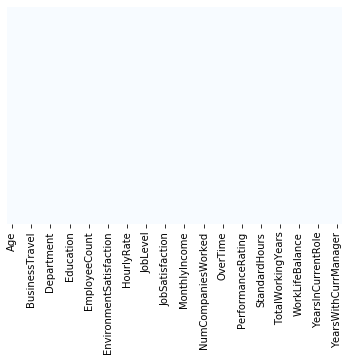

In [147]:
# Let's see if we have any missing data (No missing data since heatmap is monochromatic)
sns.heatmap(employees.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [148]:
# We can also check for missing values like this
employees.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

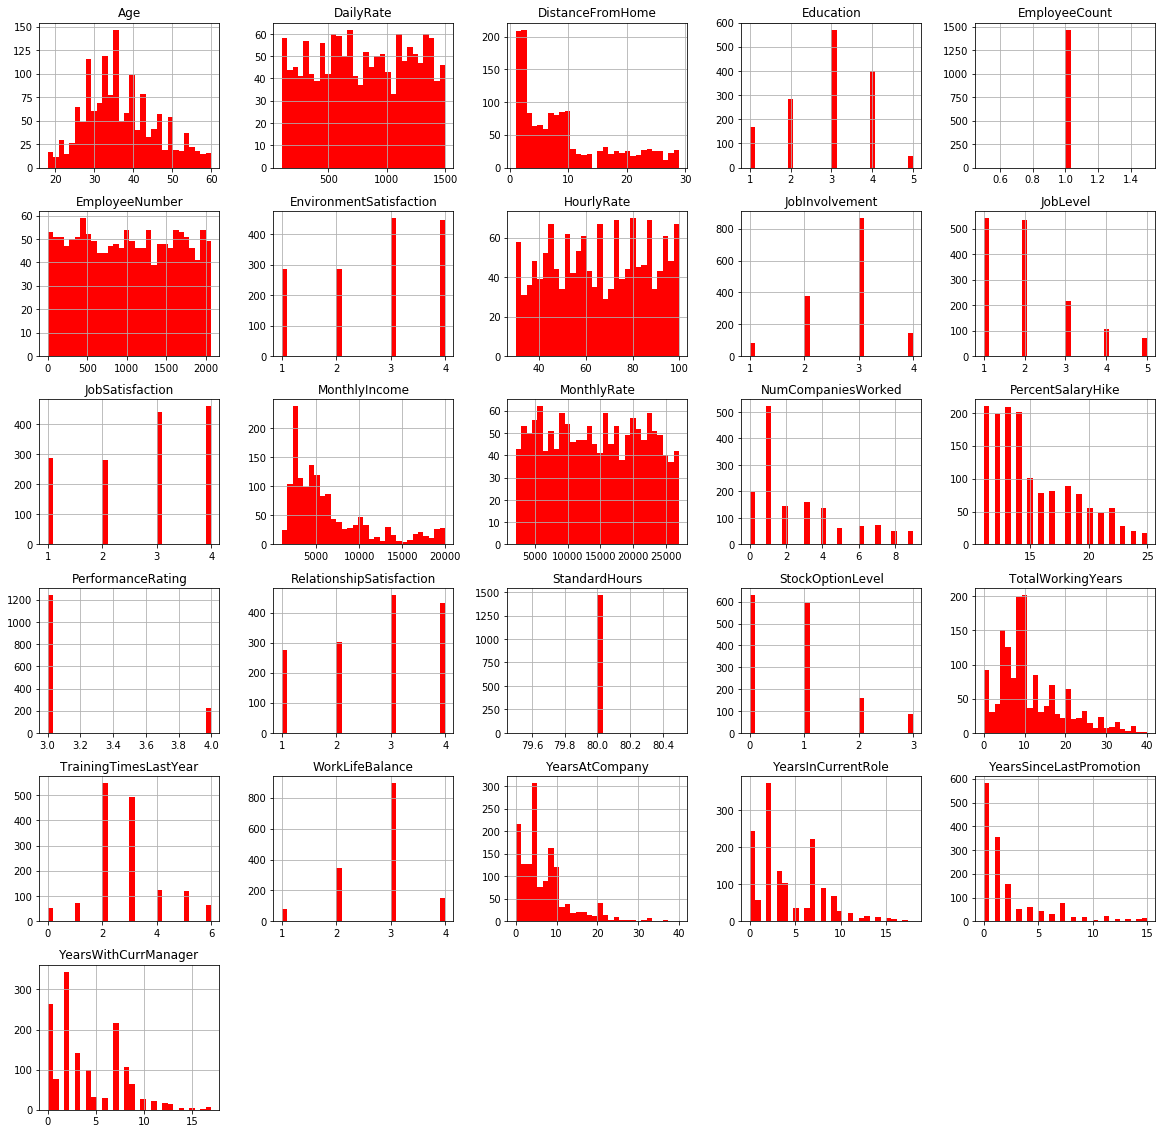

In [3]:
# Look at the distribution of each column
employees.hist(bins=30, figsize=(20,20), color='r');

In [150]:
# Drop variables that do not contribute much to the analysis
employees.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [151]:
# Let us see how many employees left the company and how many stayed
left= employees[employees['Attrition']==1]      # Filter Data Frame by a condition
stay= employees[employees['Attrition']==0]

In [152]:
# Check the number of people who left and stayed
# Seems like we are dealing with an imbalanced data
left.shape[0], stay.shape[0]

(237, 1233)

In [153]:
# Let us see what the statistics of the left employees say
left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [154]:
# Let us see what the statistics of the stayed employees say
stay.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### From the above comparison, we can see that,

1) Average age of the employees who stayed is higher compared to who left
2) Employees who stayed live closer to the company
3) Their job satisfaction and involvement are higher
4) Their hourly pay is higher
5) Employees who stayed tend to have higher 'StockOptionLevel'.

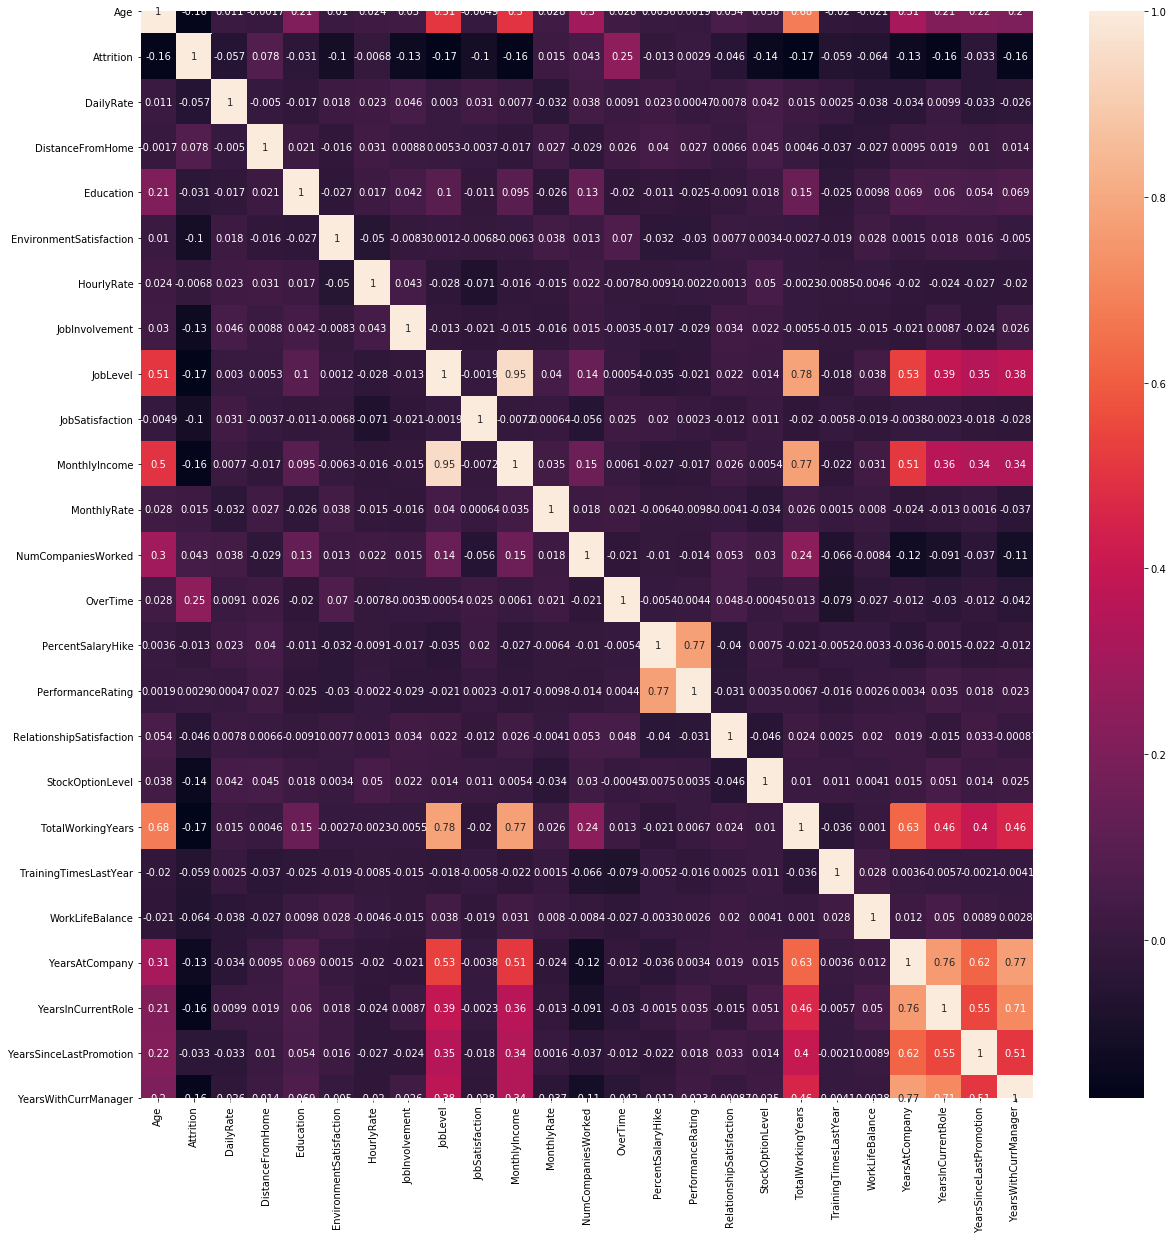

In [155]:
# Let us have a look at the correlation matrix of the employees
correlation= employees.corr()
fig, axis= plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True)

### We can observe that,

1) Job level is strongly correlated with TotalWorkingHours
2) Monthly income is strongly correlated with JobLevel
3) Monthly income is strongly correlated with TotalWorkinngHours
4) Age is strongly correlated with monthly income


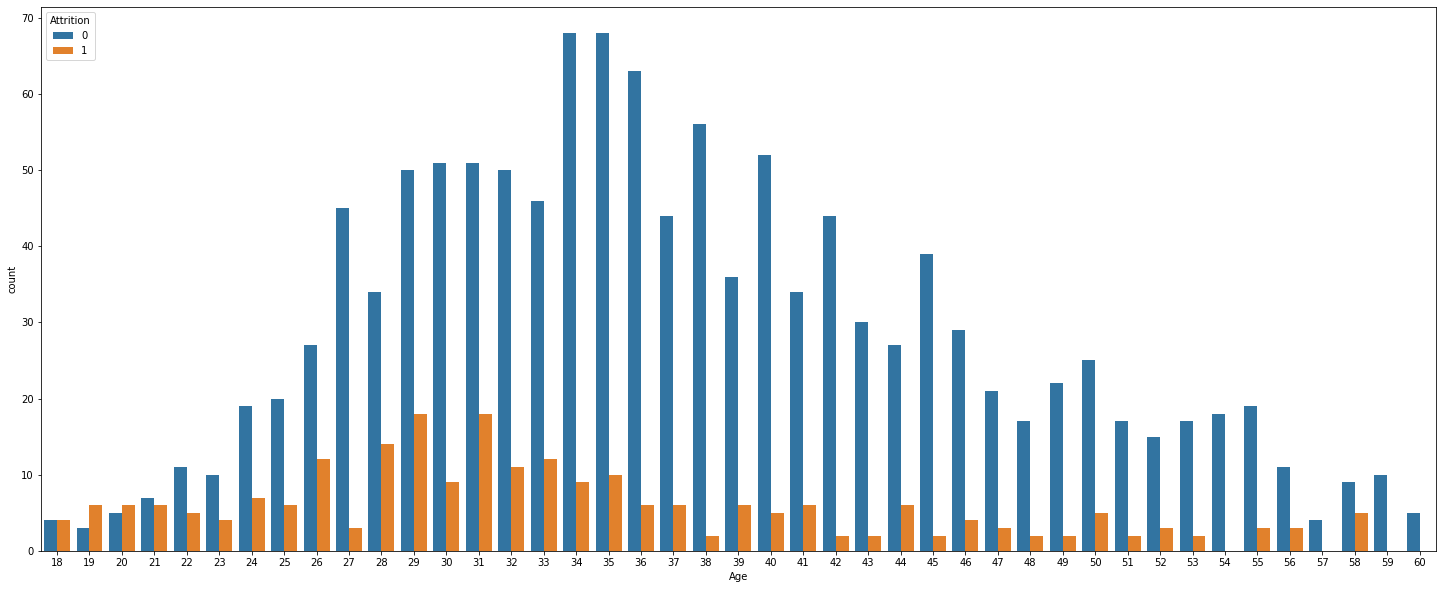

In [156]:
# Visualize the Age of people who left and stayed
plt.figure(figsize=(25,10))
sns.countplot(data=employees, x='Age', hue='Attrition')

We can see from the plot that most people who left the company are in the age range of 18-35. Older people seem to have stayed in the company.

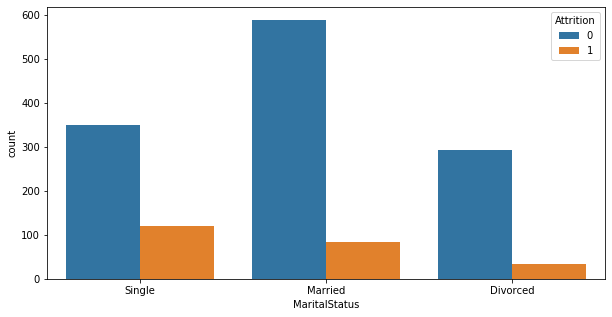

In [157]:
# Let us also visualize the MaritalStatus, JobLevel, JobInvolvement, JobSatisfaction of the employees who left and stayed
plt.figure(figsize=[10,5])
sns.countplot(data=employees, x='MaritalStatus', hue='Attrition')

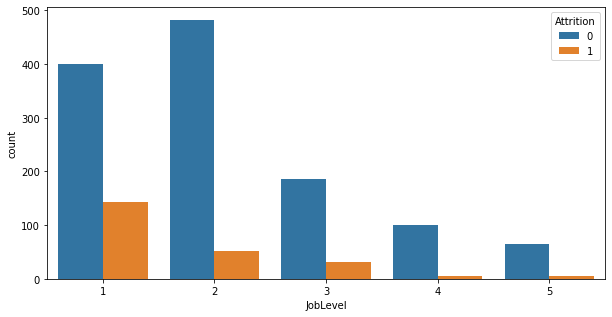

In [158]:
plt.figure(figsize=[10,5])
sns.countplot(data=employees, x='JobLevel', hue='Attrition')

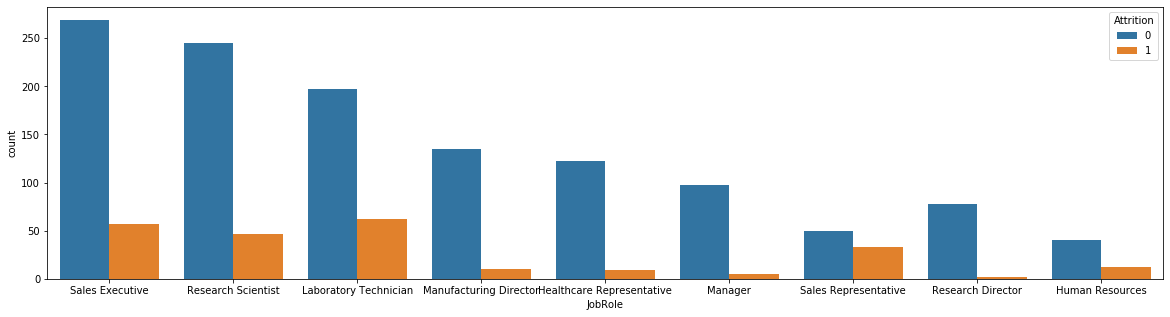

In [159]:
plt.figure(figsize=[20,5])
sns.countplot(data=employees, x='JobRole', hue='Attrition')

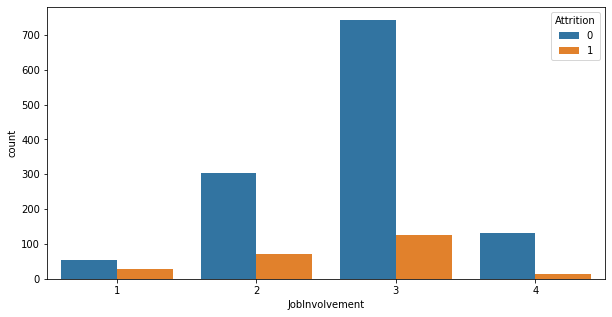

In [160]:
plt.figure(figsize=[10,5])
sns.countplot(data=employees, x='JobInvolvement', hue='Attrition')

From the plot, 

Single people tend to leave compared to married and divorced. \
Sales representatives leave compared to any other job. \
Less involved employees tend to leave the company.\
Less experienced (low job level) tend to leave the company.

Text(0.5, 0, 'Distance From Home')

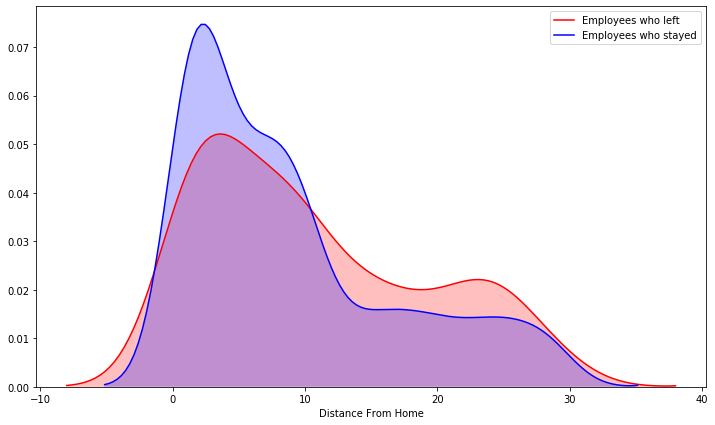

In [161]:
# Let us plot Kernel Density Estimate Plots (KDE)
# KDE is used for visualizing the probability density of a continuous variable
# KDE describes the probability density at different values in a continuous variable

plt.figure(figsize=(12,7))
sns.kdeplot(left['DistanceFromHome'], label='Employees who left', shade=True, color='r')
sns.kdeplot(stay['DistanceFromHome'], label='Employees who stayed', shade=True, color='b')
plt.xlabel('Distance From Home')

Text(0.5, 0, 'Years With Current Manager')

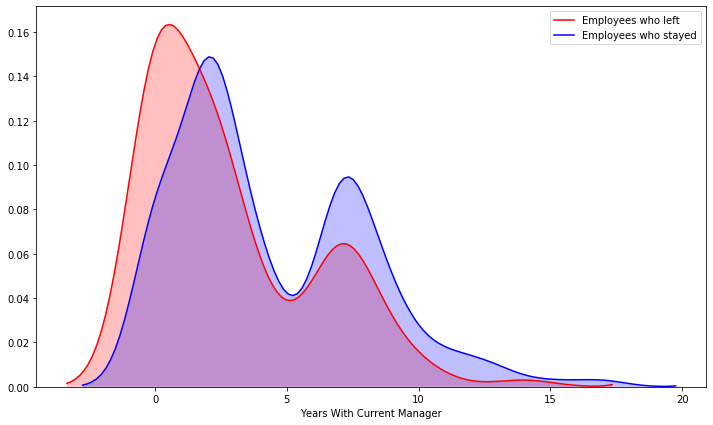

In [162]:
plt.figure(figsize=(12,7))
sns.kdeplot(left['YearsWithCurrManager'], label='Employees who left', shade=True, color='r')
sns.kdeplot(stay['YearsWithCurrManager'], label='Employees who stayed', shade=True, color='b')
plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

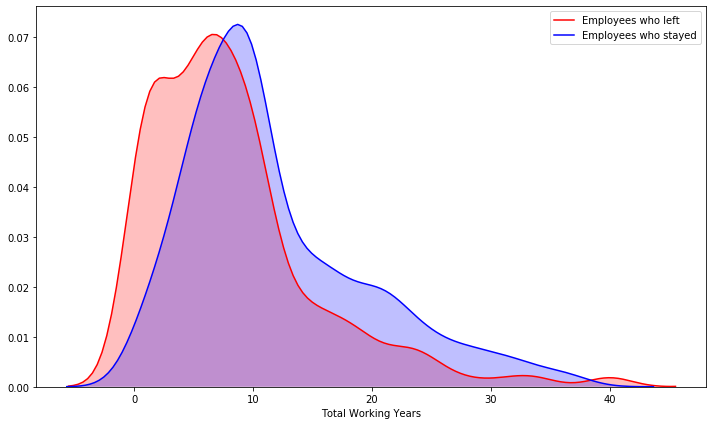

In [163]:
plt.figure(figsize=(12,7))
sns.kdeplot(left['TotalWorkingYears'], label='Employees who left', shade=True, color='r')
sns.kdeplot(stay['TotalWorkingYears'], label='Employees who stayed', shade=True, color='b')
plt.xlabel('Total Working Years')

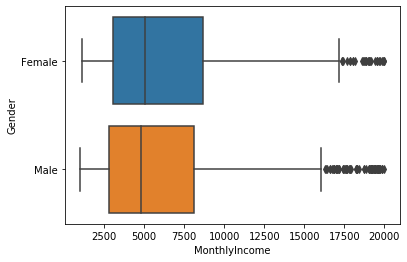

In [164]:
# Let us see the gender vs monthly income
sns.boxplot(x='MonthlyIncome', y='Gender', data=employees)

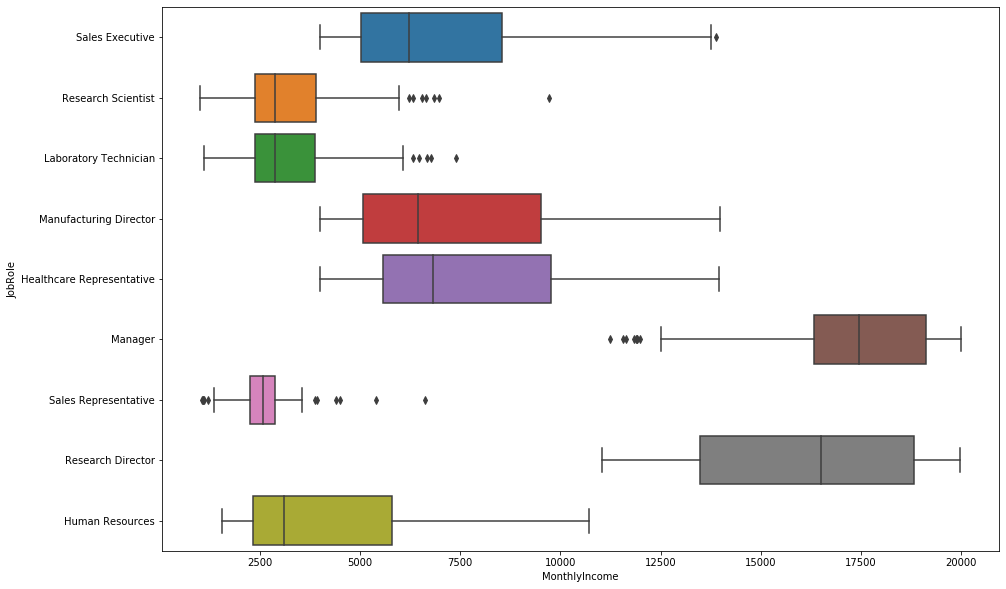

In [165]:
# Let us see the gender vs monthly income
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employees)

---

## Data Cleaning and Creating Training and Test Data Sets

In [166]:
employees.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [167]:
# Encode categorical variables
x_cat= employees[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()
x_cat= ohe.fit_transform(x_cat).toarray()
x_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [168]:
x_cat.shape

(1470, 26)

In [169]:
x_cat= pd.DataFrame(x_cat)
x_cat.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
# Drop Attrition, which is the target variable
cols = [col for col in employees.columns if col not in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus','Attrition']]
x_numerical = employees[cols]

In [171]:
x_numerical.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0


In [172]:
# Create the Overall Training Set
x_overall= pd.concat([x_numerical, x_cat], axis=1)
x_overall.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### We should scale our data before we can feed our data into our NN and other ML Models. 

In [177]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
x= mms.fit_transform(x_overall)
x

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [178]:
# Create the target variable, y
y= employees['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

---

## Build and Train a Logistic Regression Classifier

In [179]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [180]:
x_train.shape, x_test.shape

((1176, 50), (294, 50))

In [185]:
# Build a Logistic Regressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor= LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
# Predict results on unseen test data and calculate the accuracy of prediction
y_pred= regressor.predict(x_test)
print('Accuracy {} %'.format(100*accuracy_score(y_pred, y_test)))

Accuracy 89.45578231292517 %


The confusion matrix is: 
 [[232  25]
 [ 23  14]]


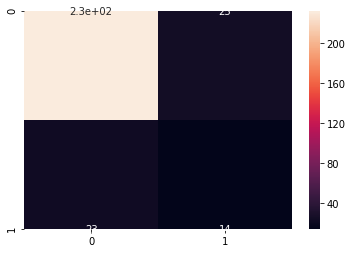

In [221]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print('The confusion matrix is: \n',  cm)

In [197]:
# Let us look at the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       257
           1       0.61      0.46      0.52        37

    accuracy                           0.89       294
   macro avg       0.77      0.71      0.73       294
weighted avg       0.88      0.89      0.89       294



### We can see from the above classification report that the Logistic Regression model perform well on class 0 but its performance on class 1 is very poor. Let us go ahead and see how the other models will perform.

---

## Building and Training a Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [199]:
# Predict results on the test set
y_pred= classifier.predict(x_test)

The confusion matrix is: 
 [[232  25]
 [ 23  14]]


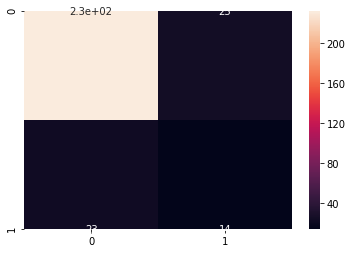

In [220]:
# Testing the performance of the classifier 
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print('The confusion matrix is: \n',  cm)

In [201]:
# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       257
           1       0.64      0.19      0.29        37

    accuracy                           0.88       294
   macro avg       0.77      0.59      0.61       294
weighted avg       0.86      0.88      0.86       294



---

## Building and Training an ANN Classifier

In [203]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))      #Output layer

In [204]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [205]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
# Fit the training set to the model
epochs_hist= model.fit(x_train, y_train, epochs=100, batch_size=50)

Train on 1176 samples
Epoch 1/100
1176/1176 [==============================] - 1s 542us/sample - loss: 0.4540 - accuracy: 0.8257
Epoch 2/100
1176/1176 [==============================] - 0s 93us/sample - loss: 0.3598 - accuracy: 0.8529
Epoch 3/100
1176/1176 [==============================] - 0s 103us/sample - loss: 0.3142 - accuracy: 0.8844
Epoch 4/100
1176/1176 [==============================] - 0s 97us/sample - loss: 0.2819 - accuracy: 0.8920
Epoch 5/100
1176/1176 [==============================] - 0s 96us/sample - loss: 0.2581 - accuracy: 0.8980
Epoch 6/100
1176/1176 [==============================] - 0s 97us/sample - loss: 0.2249 - accuracy: 0.9167
Epoch 7/100
1176/1176 [==============================] - 0s 103us/sample - loss: 0.1825 - accuracy: 0.9320
Epoch 8/100
1176/1176 [==============================] - 0s 103us/sample - loss: 0.1648 - accuracy: 0.9320
Epoch 9/100
1176/1176 [==============================] - 0s 101us/sample - loss: 0.1370 - accuracy: 0.9456
Epoch 10/100
1176/1

In [207]:
# Predict results on the test set
y_pred= model.predict(x_test)
y_pred= (y_pred>0.5)

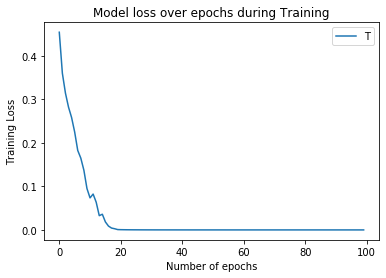

In [209]:
# Visualize the training loss over epoch
plt.plot(epochs_hist.history['loss'])
plt.title("Model loss over epochs during Training")
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.legend("Training Loss")
plt.show()

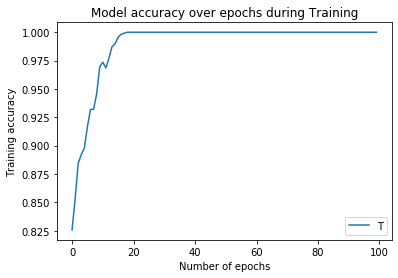

In [213]:
# Visualize the training accuracy
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model accuracy over epochs during Training")
plt.xlabel("Number of epochs")
plt.ylabel("Training accuracy")
plt.legend("Training accuracy", loc='lower right', )
plt.show()

Confusion Matrix: 
 [[232  25]
 [ 23  14]]


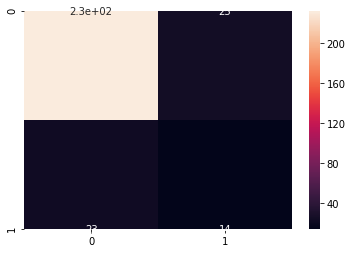

In [218]:
# Creating the confusion matrix
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
sns.heatmap(cm, annot=True)
plt.show()

In [219]:
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       257
           1       0.36      0.38      0.37        37

    accuracy                           0.84       294
   macro avg       0.63      0.64      0.64       294
weighted avg       0.84      0.84      0.84       294

